In [28]:
import random
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
random.seed (1234) #it established the seed from which random function will be runned
random.random()

0.9664535356921388

In [3]:
random.random() # now random plays without any seed. Any value between 0 and 1 might be obtained.

0.4407325991753527

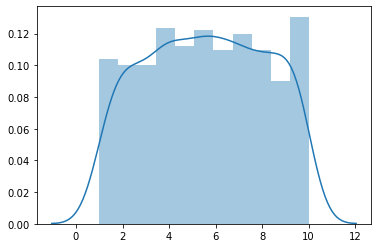

In [4]:
unifNumbers = [random.uniform (1,10) for i in range(1001)] #1000 random numbers in a list
sns.distplot(unifNumbers)

We see that's a uniform distribution. Each number has equal probability of being selected, so we can't get shape that represents a real world distribution. If a shape it's needed one can then use the commands below:

Text(0.5, 1.0, 'Normal distribution using the random.normalvariate() function')

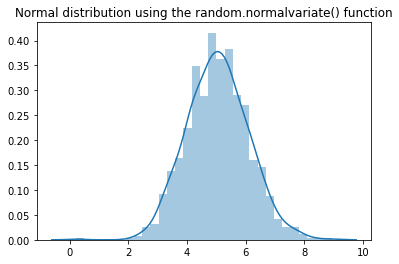

In [5]:
mn = 5
sigma = 1
variateNumbers = [random.normalvariate(mn, sigma) for i in range (1001)]
sns.distplot(variateNumbers).set_title("Normal distribution using the random.normalvariate() function")

Text(0.5, 1.0, 'Normal distribution using the np.random.normal function')

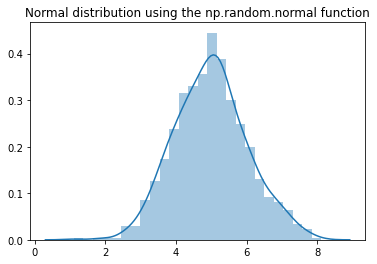

In [36]:
sns.distplot(np.random.normal(mn, sigma, 1000)).set_title("Normal distribution using the np.random.normal function")

## How to use random library to sample from a given population (SRS)

In [6]:
mn = 5
std = 1
population = [random.normalvariate(mn, std) for _ in range (10001)]
sampleA = random.sample(population, 500)
sampleB = random.sample(population, 500)
print(np.mean(sampleA), np.mean(sampleB),np.std(sampleA), np.std(sampleB))

5.054758032590474 5.006728649779085 0.9661593975764416 1.0186099498869599


We see that the values are not exact, but still pretty close :)

#### Below we see how random sampling yields estimated parameters that on average represent the true parameter values.

In [7]:
replication = 1000
sampleSize = 500

meanDistribution = np.empty(replication)
for i in range(replication):
    meanDistribution[i] = np.mean(random.sample(population, 500))

np.mean(meanDistribution)

5.003718762071457

In [8]:
stdDistribution = np.empty(replication)
for i in range(replication):
    stdDistribution[i] = np.std(random.sample(population, 500))

np.mean(stdDistribution)

0.9832399789435549

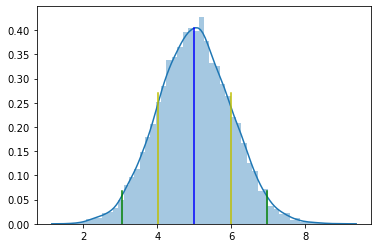

In [27]:
sns.distplot(population)
plt.axvline(np.mean(population),0, 0.9, color = 'b')
plt.axvline(np.mean(population) - np.std(population), 0, 0.6, color = 'y')
plt.axvline(np.mean(population) + np.std(population), 0, 0.6, color = 'y')
plt.axvline(np.mean(population) + 2*np.std(population), 0, 0.15, color = 'g')
plt.axvline(np.mean(population) - 2*np.std(population),0, 0.15, color = 'g',)

In [43]:
pd.Series(population).describe()

count    10001.000000
mean         5.003917
std          0.985030
min          1.639387
25%          4.332294
50%          5.001053
75%          5.669325
max          8.885423
dtype: float64

In [32]:
from statsmodels.distributions.empirical_distribution import ECDF

In [36]:
ecdf = ECDF (population)
ecdf.x # it normalizes the function to its total population creating a cumulative curve
ecdf.y

array([0.00000000e+00, 9.99900010e-05, 1.99980002e-04, ...,
       9.99800020e-01, 9.99900010e-01, 1.00000000e+00])

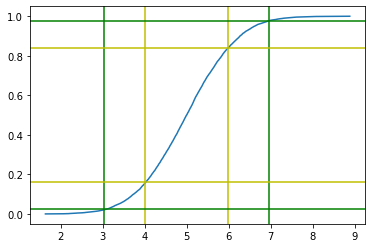

In [50]:
sns.lineplot(ecdf.x, ecdf.y)
plt.axvline(x = np.mean(population) - np.std(population), color ='y')
plt.axvline(x = np.mean(population) - 2* np.std(population), color ='g')
plt.axvline(x = np.mean(population) + np.std(population), color ='y')
plt.axvline(x = np.mean(population) + 2* np.std(population), color ='g')

plt.axhline(y = 0.025, color ='g')
plt.axhline(y = 0.16, color ='y')
plt.axhline(y = 0.975, color ='g')
plt.axhline(y = 0.84, color ='y')

We can verify how the empirical rule of 68%, 95%, 99% is true. Above are represented the cumulative curve of a normal distribution and lines representing units of standard deviation from the mean. They are 3,4,6, and 7, as calculated below:

In [54]:
print(np.mean(population) - (2 * np.std(population))
print(np.mean(population) + (np.std(population)))
print(np.mean(population) + (2 * np.std(population)))


3.0339557295512307
4.018936261192264
5.988897324474333
6.973877856115367


Lastly, to review functions of randomness:

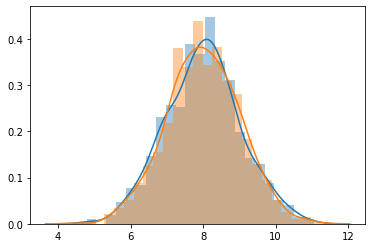

In [65]:
x = np.random.normal(8, 1, 1000)
sns.distplot(x)

y = [random.normalvariate(8, 1) for i in range(1000)]
sns.distplot(y)

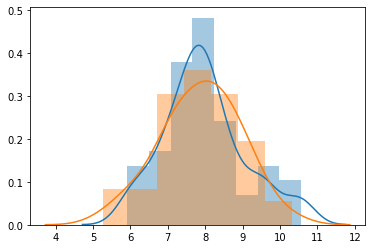

In [67]:
sns.distplot(np.random.choice(x, 50))
sns.distplot(random.sample(y, 50))